In [26]:
import sys
sys.path.append('..')

from models import basic_dnn_regression
from develop.file_listing import *

from sklearn import metrics
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from tqdm import tqdm_notebook

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.svm import SVR

In [2]:
ckpt_path = "./out/deeppain/"
basedir = '/media/cocoan-gpu1/wani8T/data/deeppain'

# Making Beta list

In [3]:
in_condition_1 = ['study01_bmrk3', 'study02_bmrk4', 'study03_nsf', 'study04_ie', 'study05_exp', 'study06_ilcp']
in_condition_2 = ['subject']
out_conidtion = ['nopain']

In [4]:
search_list = dir_search(basedir=basedir, in_condition_1=in_condition_1, 
                         in_condition_2 = in_condition_2, 
                         out_conidtion=out_conidtion)

In [5]:
beta_full_path_list = beta_file_list(search_list, 15)
beta_full_path_list[:10]

array(['/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/subject001/beta0057.npy',
       '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/subject001/beta0040.npy',
       '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/subject001/beta0027.npy',
       '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/subject001/beta0008.npy',
       '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/subject001/beta0005.npy',
       '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/subject001/beta0051.npy',
       '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/subject001/beta0044.npy',
       '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/subject001/beta0010.npy',
       '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/subject001/beta0020.npy',
       '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/subject001/beta0050.npy'],
      dtype='<U77')

In [6]:
beta_full_path_list.shape

(2745,)

In [7]:
file_dict = beta_file_dict(beta_full_path_list)
file_dict['subject001']

['/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/subject001/beta0057.npy',
 '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/subject001/beta0057.npy',
 '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/subject001/beta0040.npy',
 '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/subject001/beta0027.npy',
 '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/subject001/beta0008.npy',
 '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/subject001/beta0005.npy',
 '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/subject001/beta0051.npy',
 '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/subject001/beta0044.npy',
 '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/subject001/beta0010.npy',
 '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/subject001/beta0020.npy',
 '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/subject001/beta0050.npy',
 '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/subject001/beta0016.npy',
 '/media/cocoan-

# Making Rating list

In [8]:
in_condition_1 = ['study01_bmrk3', 'study02_bmrk4', 'study03_nsf', 'study04_ie', 'study05_exp', 'study06_ilcp']
in_condition_2 = ['rating_standard']
out_conidtion = ['nopain']

In [9]:
rating_full_path_list = rating_file_list(basedir, in_condition_1, 
                                    in_condition_2, out_conidtion=out_conidtion)
rating_full_path_list[:10]

array(['/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/rating_standard/study01_bmrk3_subject001_dat.npy',
       '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/rating_standard/study01_bmrk3_subject002_dat.npy',
       '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/rating_standard/study01_bmrk3_subject003_dat.npy',
       '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/rating_standard/study01_bmrk3_subject004_dat.npy',
       '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/rating_standard/study01_bmrk3_subject005_dat.npy',
       '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/rating_standard/study01_bmrk3_subject006_dat.npy',
       '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/rating_standard/study01_bmrk3_subject007_dat.npy',
       '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/rating_standard/study01_bmrk3_subject008_dat.npy',
       '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/rating_standard/study01_bmrk3_subj

In [10]:
index_dict = rating_index_dict(beta_full_path_list, rating_full_path_list)
index_dict

{'beta_full_path_list': array(['/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/subject001/beta0057.npy',
        '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/subject001/beta0040.npy',
        '/media/cocoan-gpu1/wani8T/data/deeppain/study01_bmrk3/subject001/beta0027.npy',
        ...,
        '/media/cocoan-gpu1/wani8T/data/deeppain/study06_ilcp/subject183/beta0058.npy',
        '/media/cocoan-gpu1/wani8T/data/deeppain/study06_ilcp/subject183/beta0031.npy',
        '/media/cocoan-gpu1/wani8T/data/deeppain/study06_ilcp/subject183/beta0042.npy'],
       dtype='<U77'), 'index_list_np': array([56, 39, 26, ..., 57, 30, 41])}

In [11]:
rating_list = rating_value_list(rating_full_path_list, index_dict)
rating_list.shape

(2745,)

In [12]:
data_shape = np.load(beta_full_path_list[0]).flatten().shape
X = np.empty((len(beta_full_path_list),data_shape[0]))

for i in tqdm_notebook(range(len(beta_full_path_list))):
    temp_data = np.load(beta_full_path_list[i]).flatten()
    X[i] = temp_data

In [13]:
y = rating_list
y.shape

(2745,)

# PCA

In [37]:
df = pd.DataFrame(X)

In [38]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,510330,510331,510332,510333,510334,510335,510336,510337,510338,510339
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [43]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [44]:
scaled_data = scaler.transform(df)

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1000)

In [47]:
df.shape

(2745, 510340)

In [48]:
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=1000, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [49]:
x_pca = pca.transform(df)

In [50]:
x_pca.shape

(2745, 1000)

In [ ]:
df_comp = pd.DataFrame(pca.components_)

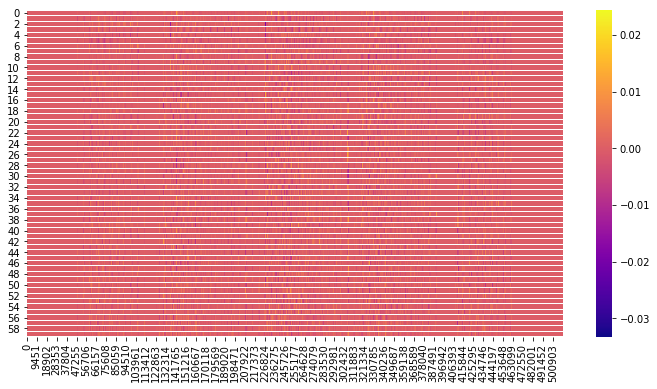

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma')

# Linear Regression

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)

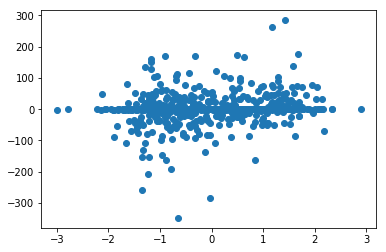

In [28]:
r2_score(y_test, predictions)

-1986.4638139803244

In [31]:
predictions2 = lm.predict(X_train)
plt.scatter(y_train, predictions2)

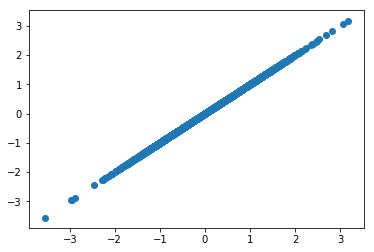

In [33]:
r2_score(y_train, predictions2)

1.0

# PCA linear regression

In [51]:
X_pca_train, X_pca_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=101)

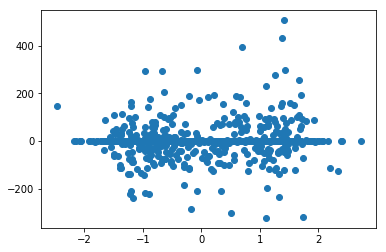

In [52]:
lm = LinearRegression()
lm.fit(X_pca_train, y_train)
predictions = lm.predict(X_pca_test)
plt.scatter(y_test, predictions)

In [53]:
r2_score(y_test, predictions)

-4636.172082273941

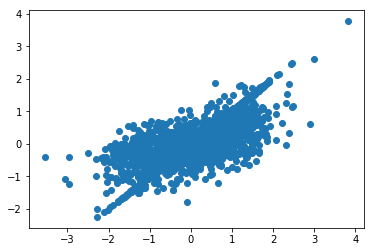

In [ ]:
predictions2 = lm.predict(X_pca_train)
plt.scatter(y_train, predictions2)

In [ ]:
r2_score(y_train, predictions2)

0.5771889690943118

# SVR linear

[LibSVM]

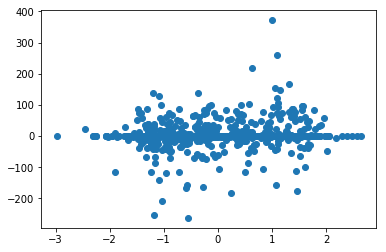

In [19]:
svr_lin = SVR(kernel='linear', C=1e3, verbose=True)
svr_lin.fit(X_train,y_train)
svr_lin_prediction = svr_lin.predict(X_test)
plt.scatter(y_test, svr_lin_prediction)

In [20]:
r2_score(y_test, svr_lin_prediction)

-1728.131964913307

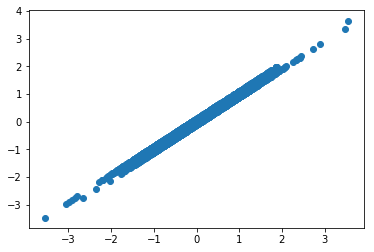

In [21]:
svr_lin_prediction2 = svr_lin.predict(X_train)
plt.scatter(y_train, svr_lin_prediction2)

In [22]:
r2_score(y_train, svr_lin_prediction2)

0.990218663249587

# PCA SVR linear 

In [ ]:
svr_lin = SVR(kernel='linear', C=1e3, verbose=True)
svr_lin.fit(X_pca_train,y_train)
svr_lin_prediction = svr_lin.predict(X_pca_test)
plt.scatter(y_test, svr_lin_prediction)

[LibSVM]

In [ ]:
r2_score(y_test, svr_lin_prediction)

In [ ]:
svr_lin_prediction2 = svr_lin.predict(X_pca_train)
plt.scatter(y_train, svr_lin_prediction2)

In [ ]:
r2_score(y_train, svr_lin_prediction2)

# SVR rbf kernel

[LibSVM]

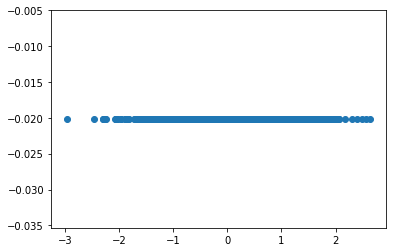

In [23]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1, verbose=True)
svr_rbf.fit(X_train,y_train)
svr_rbf_prediction = svr_rbf.predict(X_test)
plt.scatter(y_test, svr_rbf_prediction)

In [24]:
r2_score(y_test, svr_rbf_prediction)

-1.567010841285743e-05

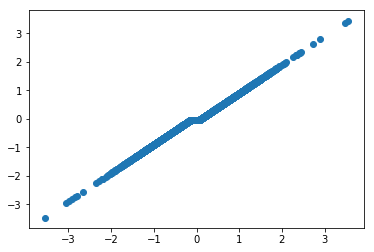

In [25]:
svr_rbf_prediction2 = svr_rbf.predict(X_train)
plt.scatter(y_train, svr_rbf_prediction2)

In [26]:
r2_score(y_train, svr_rbf_prediction2)

0.9903106732097021

# PCA SVR rbf kernel

In [ ]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1, verbose=True)
svr_rbf.fit(X_pca_train,y_train)
svr_rbf_prediction = svr_rbf.predict(X_pca_test)
plt.scatter(y_test, svr_rbf_prediction)

In [ ]:
r2_score(y_test, svr_rbf_prediction)

In [ ]:
svr_rbf_prediction2 = svr_rbf.predict(X_pca_train)
plt.scatter(y_train, svr_rbf_prediction2)

In [ ]:
r2_score(y_train, svr_rbf_prediction2)